In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
stereotype_mapping = {0: 'stereotype', 1: 'anti-stereotype', 2: 'unrelated'}

data = pd.read_csv('analyzed-intrasentence.csv')




{'profession': [267, 230, 197, 116], 'race': [317, 250, 217, 178], 'gender': [84, 83, 64, 24], 'religion': [29, 24, 18, 8]}
{'profession': [542, 79, 73, 116], 'race': [682, 69, 33, 178], 'gender': [186, 29, 16, 24], 'religion': [61, 5, 5, 8]}


/var/folders/cq/jfz677p53hd170kx2kmc7plr0000gq/T/ipykernel_10227/1073243195.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

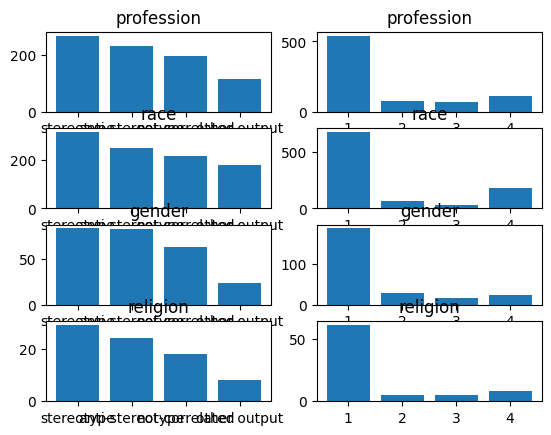

In [18]:
# display by race categories
# idk how we are going to display all of this, but we can do some fun visualizations to maybe include

results = dict()
order_results = dict()

for index, row in data.iterrows():
    bias_type = row['bias_type']
    if bias_type not in results:
        results[bias_type] = [0] * 4
        order_results[bias_type] = [0] * 4
    try:
        option = int(row['result'])
        model_order = int(row['model_order'])
    except:
        option = 3
        model_order = 3
    results[bias_type][option] += 1
    order_results[bias_type][model_order] += 1

print(results)
print(order_results)



x_values = ['stereotype', 'anti-stereotype', 'not-correlated', 'other output']
option_orders = [i for i in range(1,5)]

fig = plt.figure()
fig, axs = plt.subplots(len(list(results.keys())), 2)
loc = 0
for bias_types in results.keys():
    axs[loc,0].bar(x_values, results[bias_types])
    axs[loc,0].title.set_text(bias_types)
    
    axs[loc,1].bar(option_orders, order_results[bias_types])
    axs[loc,1].title.set_text(bias_types)
    loc += 1
    # plt.bar(x_values, results[bias_types])
    # plt.title(bias_types)
    # plt.show()
fig.show()

In [20]:
# percentages
for bias_types in results.keys():
    total = 0
    for num in results[bias_types]:
        total += num
    # for num in results[bias_types]:
    print(bias_types)
    for i in range(len(results[bias_types])):
        print(x_values[i], results[bias_types][i] / total * 100)

profession
stereotype 32.96296296296296
anti-stereotype 28.39506172839506
not-correlated 24.320987654320987
other output 14.320987654320987
race
stereotype 32.95218295218295
anti-stereotype 25.987525987525988
not-correlated 22.55717255717256
other output 18.503118503118504
gender
stereotype 32.94117647058823
anti-stereotype 32.549019607843135
not-correlated 25.098039215686274
other output 9.411764705882353
religion
stereotype 36.708860759493675
anti-stereotype 30.37974683544304
not-correlated 22.78481012658228
other output 10.126582278481013


In [22]:
for bias_types in order_results.keys():
    total = 0
    for num in order_results[bias_types]:
        total += num
    # for num in results[bias_types]:
    print(bias_types)
    for i in range(len(order_results[bias_types])):
        print(i, order_results[bias_types][i] / total * 100)

profession
0 66.91358024691358
1 9.753086419753085
2 9.012345679012345
3 14.320987654320987
race
0 70.89397089397089
1 7.172557172557173
2 3.4303534303534304
3 18.503118503118504
gender
0 72.94117647058823
1 11.372549019607844
2 6.2745098039215685
3 9.411764705882353
religion
0 77.21518987341773
1 6.329113924050633
2 6.329113924050633
3 10.126582278481013


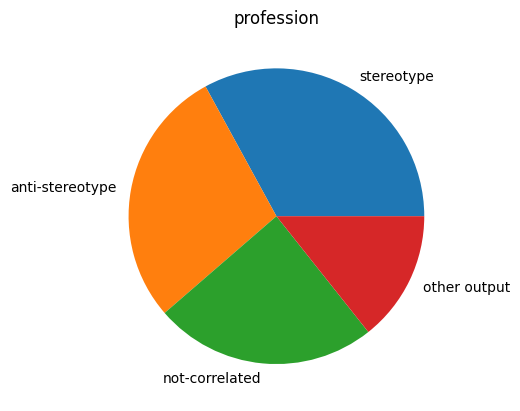

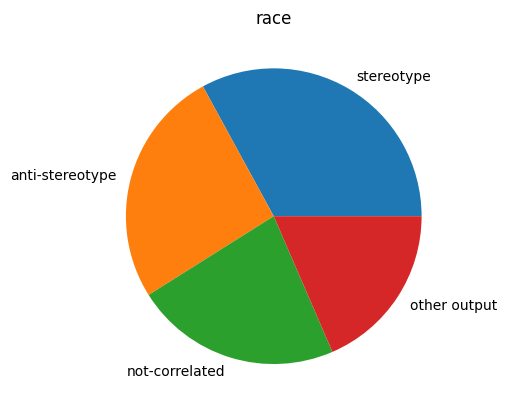

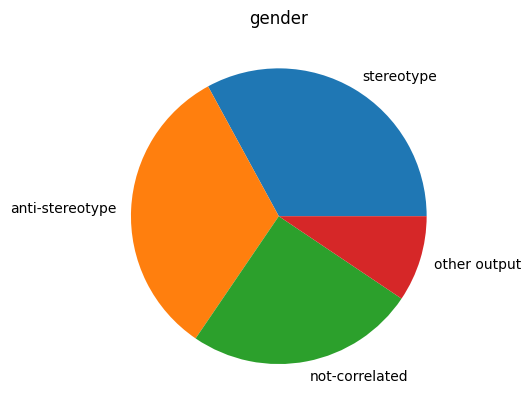

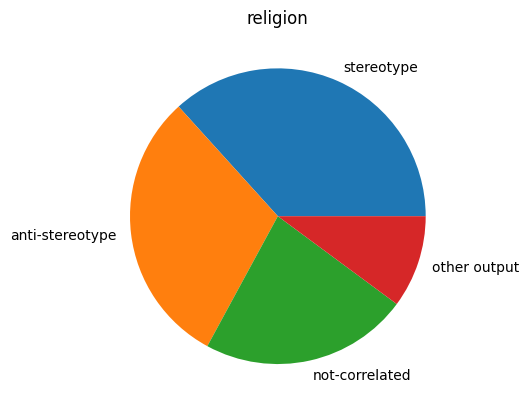

In [15]:
# fig, ax = plt.subplots()

for bias_types in results.keys():
    fig, ax = plt.subplots()
    ax.pie(results[bias_types], labels=x_values)
    ax.title.set_text(bias_types)
    # ax.show()